### Step 1: Prepare a csv file using excel (note: formatting works better with old excel version)

### Step 2: using XYTableToPoint to convert csv file into ESRI shp format

### Step 3: Define field name and attribute values and use CalculateField to update field values

In [1]:
import arcpy
#define field names
ssdm_dict = dict()
ssdm_dict['LAST_UPDATE']='"22/02/2021"'
ssdm_dict['LAST_UPDATE_BY']='"XL"'
ssdm_dict['SURVEY_ID']='1001'
ssdm_dict['SURVEY_ID_REF']='"BN7875559"'
ssdm_dict['SAMPLING_METHOD']='"IOGP1045 Soil/Sediment Sample"'
ssdm_dict['REPORT_URL']='"11_FinalDeliverables\01_SurveyReport_Document"'
ssdm_dict['APPROVED_DATE']='"2/03/2021"'
ssdm_dict['SAMPLING_EQUIPMENT']='"Van Veen Grab Sampling"'
ssdm_dict['PENETRATION']='0'
ssdm_dict['RECOVERY']='100'
# ssdm_dict['SYMBOLOGY_CODE']= '"IOGP1045"'

#update fields
arcpy.env.workspace = r"E:\HIPP\11_Deliverables\SSDM\GIS\FGDB\HIPP_SI1001_UTM56S.gdb"
input_ft = r'Environmental_Samples\Environmental_Sample_Pnt_option1'
for in_field in ssdm_dict.keys():
    new_value = ssdm_dict[in_field]
    print(in_field,new_value)
    try:
        arcpy.management.CalculateField(input_ft, in_field, new_value, "PYTHON3", '', "TEXT")
    except Exception as e:
        print(e)

LAST_UPDATE "22/02/2021"
LAST_UPDATE_BY "XL"
SURVEY_ID 1001
SURVEY_ID_REF "BN7875559"
SAMPLING_METHOD "IOGP1045 Soil/Sediment Sample"
REPORT_URL "11_FinalDeliverables_SurveyReport_Document"
APPROVED_DATE "2/03/2021"
SAMPLING_EQUIPMENT "Van Veen Grab Sampling"
PENETRATION 0
RECOVERY 100


#### 3b Testing results

In [2]:
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS
from arcgis.mapping import show_styles, display_colormaps
from arcgis.gis import GIS
gis = GIS(username="adelmomancini", password="Geomatics123!")
from arcgis.geocoding import geocode
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry

arcpy.env.workspace = r"E:\HIPP\11_Deliverables\SSDM\GIS\FGDB\HIPP_SI1001_UTM56S.gdb"
input_ft = r'Environmental_Samples\Environmental_Sample_Pnt_option1'
sdf_test2 = pd.DataFrame.spatial.from_featureclass(input_ft)

gis = GIS(profile='your_online_profile',verify_cert=False)
m4 = GIS().map(zoomlevel=10.5)
m4.center=[-32.911,151.960]
m4.legend = True
m4



Profile your_online_profile does not have a password on file through keyring. If you are expecting this behavior (PKI or IWA authentication, entering password through run-time prompt, etc.), please ignore this message. If you would like to store your password in the your_online_profile profile, run GIS(profile = 'your_online_profile', password = ...). See the API doc for more details. (http://bit.ly/2CK2wG8)


MapView(layout=Layout(height='400px', width='100%'), legend=True)

In [3]:
sdf_test2.spatial.plot(map_widget=m4,
                 col='SAMPLE_DESC',
                 renderer_type = 'u',
                 symbol_style='d',
                 marker_size=10,
#                  linewidth=1
                )
sdf_test2.iloc[[0,-1,50,100]]

,OBJECTID,LAST_UPDATE,LAST_UPDATE_BY,FEATURE_ID,SURVEY_ID,SURVEY_ID_REF,REMARKS,SAMPLE_NAME,SAMPLE_DESC,SAMPLING_METHOD,SAMPLING_DATE,DATA_URL,REPORT_URL,PENETRATION,RECOVERY,APPROVED_DATE,SAMPLE_NUMBER,SAMPLING_EQUIPMENT,SHAPE
0,1,2021-02-22,XL,{67DE2C5C-C01E-4925-A301-53F72C5036E8},1001,BN7875559,,20210104_077,Coarse sediment,IOGP1045 Soil/Sediment Sample,2021-01-04,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,11_FinalDeliverables_SurveyReport_Document,0.0,100.0,2021-03-02,77,Van Veen Grab Sampling,"{""x"": 393726.23910000006, ""y"": 6358396.8791000..."
160,161,2021-02-22,XL,{90519A67-036F-4918-B289-095D796D5FFD},1001,BN7875559,,20210110_160,Coarse sediment,IOGP1045 Soil/Sediment Sample,2021-01-10,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,11_FinalDeliverables_SurveyReport_Document,0.0,100.0,2021-03-02,160,Van Veen Grab Sampling,"{""x"": 393726.7922, ""y"": 6341400.263200001, ""z""..."
50,51,2021-02-22,XL,{0FFEBAA5-4D19-4C85-9162-21BD9B1DC862},1001,BN7875559,,20210105_67,Mixed sediments,IOGP1045 Soil/Sediment Sample,2021-01-05,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,11_FinalDeliverables_SurveyReport_Document,0.0,100.0,2021-03-02,67,Van Veen Grab Sampling,"{""x"": 398829.66870000004, ""y"": 6360100.2369000..."
100,101,2021-02-22,XL,{F314B9F2-9EAF-4073-8EA0-93F41AF4D54F},1001,BN7875559,,20210109_096,Mud and sandy mud,IOGP1045 Soil/Sediment Sample,2021-01-09,11_FinalDeliverables\07_SeabedType\03_GrabSamp...,11_FinalDeliverables_SurveyReport_Document,0.0,100.0,2021-03-02,96,Van Veen Grab Sampling,"{""x"": 405634.5677000001, ""y"": 6356705.4499, ""z..."


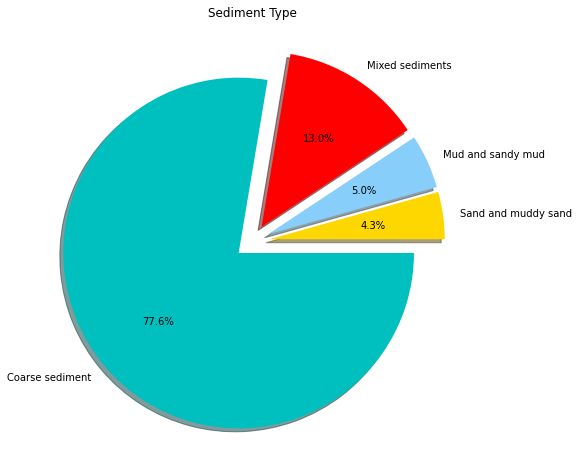

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#pile chart of sediment type distribution
fig, ax1 = plt.subplots(figsize = (8,8)) 
x = sdf_test2['SAMPLE_DESC'].value_counts(normalize=True,ascending=True)
colors = ['gold','lightskyblue','r','c'] #we know that there are 4 types
labels = list(x.index)
values = np.round(x.values*100,2)
explode = (0.1,0.1,0.1,0.1)
ax1.pie(values,colors=colors,labels=labels,explode=explode,
        autopct='%1.1f%%',counterclock=True,shadow=True)
plt.title('Sediment Type')
# ax1.legend(labels, loc = 0) 
plt.tight_layout() 
plt.show()